Original line : C0 = 5.0, C1 = 3.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 125.89119142267272
            Iterations: 5
            Function evaluations: 24
            Gradient evaluations: 5
Fitted line is : C0 = 5.495858513218274, C1 =1.4611861048396166 


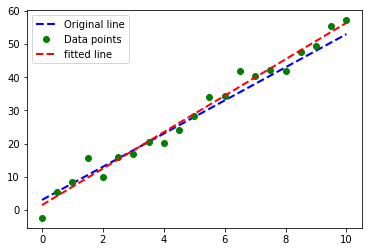

In [25]:

# fit a line to data points using optimizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo



#error function
def error(line, data):
    # to calculate error along y
    # sum((Y - (mx+c))**2)
    err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1]))**2)
    return err



# function to fit a line
def fit_line(data, error_func):
    # initial guess of C0 & C1
    l = np.float32([0,np.mean(data[:,1])])
    # minimize funtion to find minimum error along the line
    # what to minimize = error function
    # initial guess = l 
    # method to minimize = SLSQP
    result = spo.minimize(error_func, l, args = (data), method='SLSQP' , options ={'disp':True})
    return result.x




def test_run():
    # define orginal line
    # define original C0 & C1
    l_orig = np.float32([5,3])
    # print the points
    print("Original line : C0 = {}, C1 = {}".format(l_orig[0], l_orig[1]))
    Xorig = np.linspace(0,10,21)
    # compute y_original by using (Y = mx + c)
    Yorig = l_orig[0] * Xorig + l_orig[1]
    # plot the original line
    plt.plot(Xorig, Yorig,'b--',linewidth =2.1,label="Original line")
        
    
    #generate noisy data
    noise_sigma = 3.0
    # add noise 
    noise = np.random.normal(0, noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:,0],data[:,1],'go',label="Data points")
    
    # call l_fit 
    l_fit = fit_line(data, error)
    print("Fitted line is : C0 = {}, C1 ={} ".format(l_fit[0], l_fit[1]))
    # plot the fitted line
    # plot(x, mx+c)
    plt.plot(data[:,0], l_fit[0] * data[:,0] + l_fit[1],'r--',linewidth=2.0,label="fitted line")
    
    
    # add legend in the plot
    plt.legend(loc="upper left")
    
    
if __name__ ==  "__main__":
    test_run()
    